In [44]:
import os
from PIL import Image

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.io import decode_jpeg
from tensorflow.keras import Sequential, regularizers
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, LayerNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator, NumpyArrayIterator

In [2]:
parent_dir =  os.path.dirname(os.getcwd())

In [3]:
parent_dir

'C:\\Users\\Kevin\\Documents\\Flatiron\\Phase4_Project'

In [4]:
train_path = os.path.join(parent_dir, 'Data\\train')

In [5]:
train_path

'C:\\Users\\Kevin\\Documents\\Flatiron\\Phase4_Project\\Data\\train'

In [6]:
train_path = os.path.join(parent_dir, 'Data\\train')
test_path = os.path.join(parent_dir, 'Data\\test')

In [7]:
pneumonia_filenames = os.listdir(os.path.join(train_path, 'pneumonia'))
normal_filenames = os.listdir(os.path.join(train_path, 'normal'))

In [8]:
img = 'C:\\Users\\Kevin\\Documents\\Flatiron\\Phase4_Project\\Data\\train\\NORMAL\\NORMAL-28501-0001.jpeg'

In [9]:
os.getcwd()

'C:\\Users\\Kevin\\Documents\\Flatiron\\Phase4_Project\\scratch_notebooks'

In [10]:
image = Image.open(img)

In [11]:
tf_image = np.array(image).astype('uint8')

In [12]:
x, y = tf_image.shape

In [13]:
tf_image = tf_image.reshape(1,x,y,1).astype('float32')

In [14]:
tf_image.shape

(1, 2418, 2434, 1)

In [15]:
plt.imshow(next(aug_iter)[0][0], cmap='gray')

NameError: name 'aug_iter' is not defined

In [ ]:
train_path

In [ ]:
plt.figure(figsize=(15,15))
for i in range(3):
    filename = pneumonia_filenames[i]
    img_addr = train_path + '\\PNEUMONIA\\' + filename
    img = Image.open(img_addr)
    ax = plt.subplot(1,3,i+1)
    plt.imshow(img, cmap='gray')

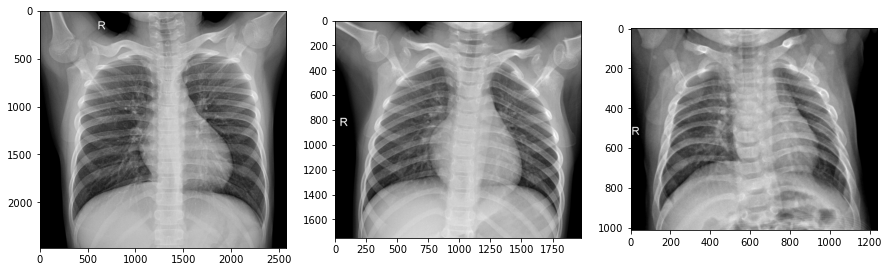

In [16]:
plt.figure(figsize=(15,15))
for i in range(3):
    filename = normal_filenames[i]
    img_addr = train_path + '\\NORMAL\\' + filename
    img = Image.open(img_addr)
    ax = plt.subplot(1,3,i+1)
    plt.imshow(img, cmap='gray')

## Model 1

----
Found 4187 images belonging to 2 classes.
----
Found 1045 images belonging to 2 classes.
----
Found 624 images belonging to 2 classes.
----
Found 5232 images belonging to 2 classes.
----


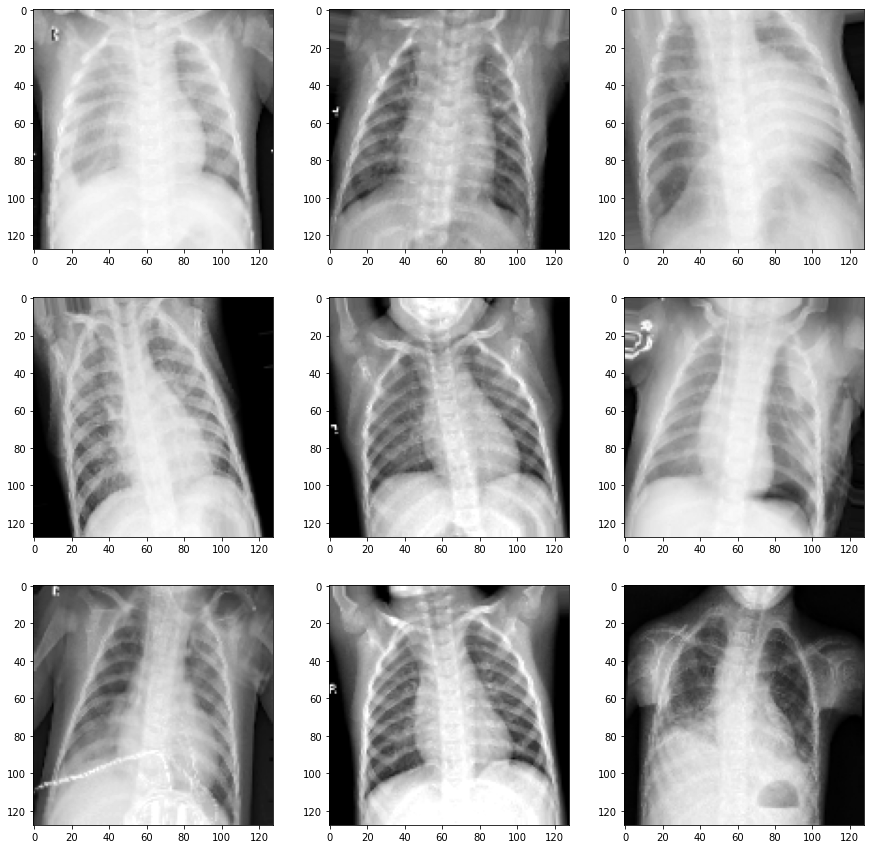

In [115]:
img_size = (128, 128)
batch_size = 32
brightness = [0.8, 1.2]
vsplit = 0.2
rrange = 10
seed = 2023

train_datagen = ImageDataGenerator(validation_split=vsplit, rotation_range=rrange, fill_mode='nearest',
                                   brightness_range=brightness)

val_datagen = ImageDataGenerator()
print('----')
train_generator = train_datagen.flow_from_directory(train_path, target_size=img_size, batch_size=batch_size,
                                                    class_mode='binary', color_mode='grayscale', subset='training',
                                                    shuffle=True, seed=seed)
print('----')
val_generator = train_datagen.flow_from_directory(train_path, target_size=img_size, batch_size=batch_size,
                                                    class_mode='binary', color_mode='grayscale', subset='validation',
                                                    shuffle=True, seed=seed)

print('----')
test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow_from_directory(test_path, target_size=img_size, batch_size=batch_size, class_mode='binary',
                                                  color_mode='grayscale')

print('----')
aug_iter = train_datagen.flow_from_directory(train_path, target_size=(128,128), color_mode='grayscale')

print('----')
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
for i in range(3):
    for j in range(3):
        image = next(aug_iter)[0][0]
        ax[i][j].imshow(image, cmap='gray')
#         ax[i][j].axis('off')

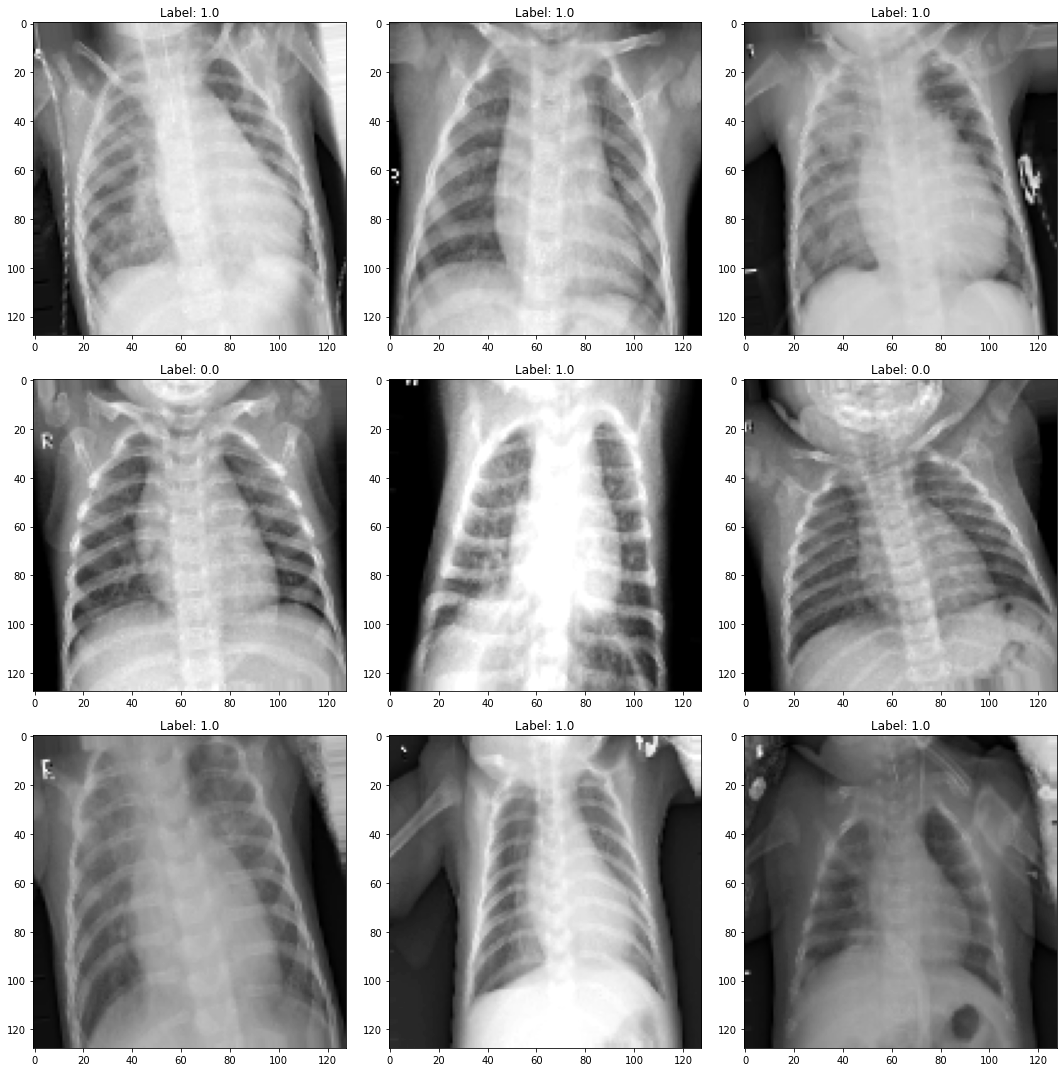

In [116]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
for i, ax in enumerate(axes.flat):
    img, label = train_generator.next()
    ax.imshow(img[0], cmap='gray')
    ax.set(title=f"Label: {label[0]}")
plt.tight_layout()
plt.show()

In [117]:
model = Sequential(name='Model1')

In [118]:
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(128,128,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [119]:
model.summary()

Model: "Model1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_83 (Conv2D)           (None, 126, 126, 128)     1280      
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 63, 63, 128)       0         
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 61, 61, 128)       147584    
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 28, 28, 64)        73792     
_________________________________________________________________
flatten_22 (Flatten)         (None, 50176)             0         
_________________________________________________________________
dense_44 (Dense)             (None, 64)                32113

In [81]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Recall', 'Precision', 'accuracy'])
model.fit(train_generator, epochs=50, workers=10, validation_data=val_generator, validation_steps=100//batch_size)

Epoch 1/50
131/131 [==============================] - 72s 549ms/step - loss: 2.2960 - recall: 0.9385 - precision: 0.7851 - accuracy: 0.7638 - val_loss: 0.2320 - val_recall: 0.9857 - val_precision: 0.9718 - val_accuracy: 0.9688
Epoch 2/50
131/131 [==============================] - 71s 542ms/step - loss: 0.4215 - recall: 0.9324 - precision: 0.8906 - accuracy: 0.8648 - val_loss: 0.3295 - val_recall: 0.9286 - val_precision: 0.9848 - val_accuracy: 0.9375
Epoch 3/50
131/131 [==============================] - 73s 554ms/step - loss: 0.2936 - recall: 0.9466 - precision: 0.9334 - accuracy: 0.9102 - val_loss: 0.2480 - val_recall: 0.9286 - val_precision: 0.9559 - val_accuracy: 0.9167
Epoch 4/50
131/131 [==============================] - 72s 546ms/step - loss: 0.2561 - recall: 0.9585 - precision: 0.9493 - accuracy: 0.9312 - val_loss: 0.2648 - val_recall: 1.0000 - val_precision: 0.9437 - val_accuracy: 0.9583
Epoch 5/50
131/131 [==============================] - 72s 551ms/step - loss: 0.5799 - recall

Epoch 37/50
131/131 [==============================] - 64s 486ms/step - loss: 0.5709 - recall: 1.0000 - precision: 0.7421 - accuracy: 0.7421 - val_loss: 0.5406 - val_recall: 1.0000 - val_precision: 0.7708 - val_accuracy: 0.7708
Epoch 38/50
131/131 [==============================] - 63s 481ms/step - loss: 0.5709 - recall: 1.0000 - precision: 0.7421 - accuracy: 0.7421 - val_loss: 0.4747 - val_recall: 1.0000 - val_precision: 0.8333 - val_accuracy: 0.8333
Epoch 39/50
131/131 [==============================] - 64s 486ms/step - loss: 0.5709 - recall: 1.0000 - precision: 0.7421 - accuracy: 0.7421 - val_loss: 0.5625 - val_recall: 1.0000 - val_precision: 0.7500 - val_accuracy: 0.7500
Epoch 40/50
131/131 [==============================] - 64s 487ms/step - loss: 0.5709 - recall: 1.0000 - precision: 0.7421 - accuracy: 0.7421 - val_loss: 0.5295 - val_recall: 1.0000 - val_precision: 0.7812 - val_accuracy: 0.7812
Epoch 41/50
131/131 [==============================] - 64s 485ms/step - loss: 0.5709 - r

In [340]:
model.fit(train_generator, epochs=50, workers=8, validation_data=val_generator, validation_steps=100//32)

Epoch 1/50
131/131 [==============================] - 70s 534ms/step - loss: 0.1565 - recall: 0.9607 - val_loss: 0.2286 - val_recall: 0.9143
Epoch 2/50
131/131 [==============================] - 70s 534ms/step - loss: 0.1324 - recall: 0.9672 - val_loss: 0.0853 - val_recall: 0.9726
Epoch 3/50
131/131 [==============================] - 70s 535ms/step - loss: 0.1281 - recall: 0.9691 - val_loss: 0.0917 - val_recall: 1.0000
Epoch 4/50
131/131 [==============================] - 70s 533ms/step - loss: 0.1128 - recall: 0.9730 - val_loss: 0.1145 - val_recall: 0.9385
Epoch 5/50
131/131 [==============================] - 70s 536ms/step - loss: 0.1050 - recall: 0.9752 - val_loss: 0.1348 - val_recall: 0.9583
Epoch 6/50
131/131 [==============================] - 70s 532ms/step - loss: 0.1640 - recall: 0.9640 - val_loss: 0.1236 - val_recall: 0.9342
Epoch 7/50
131/131 [==============================] - 70s 534ms/step - loss: 0.1125 - recall: 0.9691 - val_loss: 0.0995 - val_recall: 0.9848
Epoch 8/50
13

In [121]:
model.evaluate(test_generator)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

## Model 2

In [129]:
img_size = (256, 256)
batch_size = 64
brightness = [0.8, 1.2]
vsplit = 0.2
rrange = 10
seed = 2023

train_datagen = ImageDataGenerator(validation_split=vsplit, rotation_range=rrange, fill_mode='nearest',
                                   brightness_range=brightness)

val_datagen = ImageDataGenerator()
print('----')
train_generator = train_datagen.flow_from_directory(train_path, target_size=img_size, batch_size=batch_size,
                                                    class_mode='binary', color_mode='grayscale', subset='training',
                                                    shuffle=True, seed=seed)

print('----')
val_generator = train_datagen.flow_from_directory(train_path, target_size=img_size, batch_size=batch_size,
                                                    class_mode='binary', color_mode='grayscale', subset='validation',
                                                    shuffle=True, seed=seed)

print('----')
test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow_from_directory(test_path, target_size=img_size, batch_size=batch_size, class_mode='binary',
                                                  color_mode='grayscale')

----
Found 4187 images belonging to 2 classes.
----
Found 1045 images belonging to 2 classes.
----
Found 624 images belonging to 2 classes.


In [130]:
model2 = Sequential(name='Model2')

model2.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(256,256,1)))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(64, (3,3), activation='relu'))
model2.add(Flatten())

model2.add(LayerNormalization())
model2.add(Dropout(0.2))

model2.add(Dense(64, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [131]:
model2.summary()

Model: "Model2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_94 (Conv2D)           (None, 254, 254, 128)     1280      
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 127, 127, 128)     0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 125, 125, 128)     147584    
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 62, 62, 128)       0         
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 60, 60, 128)       147584    
_________________________________________________________________
max_pooling2d_68 (MaxPooling (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 28, 28, 64)        73792

In [ ]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Recall', 'Precision', 'accuracy'])
model2.fit(train_generator, epochs=20, workers=10, validation_data=val_generator, validation_steps=100//batch_size)

Epoch 1/20
66/66 [==============================] - 326s 5s/step - loss: 2.3706 - recall: 0.8458 - precision: 0.8348 - accuracy: 0.7614 - val_loss: 0.1383 - val_recall: 1.0000 - val_precision: 0.9038 - val_accuracy: 0.9219
Epoch 2/20
66/66 [==============================] - 327s 5s/step - loss: 0.3940 - recall: 0.9211 - precision: 0.8919 - accuracy: 0.8586 - val_loss: 0.2300 - val_recall: 1.0000 - val_precision: 0.9245 - val_accuracy: 0.9375
Epoch 3/20
66/66 [==============================] - 335s 5s/step - loss: 0.2521 - recall: 0.9372 - precision: 0.9306 - accuracy: 0.9016 - val_loss: 0.1797 - val_recall: 0.9302 - val_precision: 1.0000 - val_accuracy: 0.9531
Epoch 4/20
66/66 [==============================] - 331s 5s/step - loss: 0.2567 - recall: 0.9398 - precision: 0.9299 - accuracy: 0.9028 - val_loss: 0.0783 - val_recall: 0.9796 - val_precision: 0.9600 - val_accuracy: 0.9531
Epoch 5/20
66/66 [==============================] - 325s 5s/step - loss: 0.5557 - recall: 0.9240 - precision

In [ ]:
input = Input(shape=(input_shape[0], input_shape[1], input_shape[2]))

'''block_1'''
b1_cnv2d_1 = Conv2D(filters=16, kernel_size=(3, 3), strides=(2, 2), padding='same',
                 use_bias=False, name='b1_cnv2d_1', kernel_initializer='normal')(input)
b1_relu_1 = ReLU(name='b1_relu_1')(b1_cnv2d_1)
b1_bn_1 = BatchNormalization(epsilon=1e-3, momentum=0.999, name='b1_bn_1')(b1_relu_1)  # size: 14*14

b1_cnv2d_2 = Conv2D(filters=32, kernel_size=(1, 1), strides=(2, 2), padding='same',
                    use_bias=False, name='b1_cnv2d_2', kernel_initializer='normal')(b1_bn_1)
b1_relu_2 = ReLU(name='b1_relu_2')(b1_cnv2d_2)
b1_out = BatchNormalization(epsilon=1e-3, momentum=0.999, name='b1_out')(b1_relu_2)  # size: 14*14

'''block 2'''
b2_cnv2d_1 = Conv2D(filters=32, kernel_size=(1, 1), strides=(1, 1), padding='same',
                    use_bias=False, name='b2_cnv2d_1', kernel_initializer='normal')(b1_out)
b2_relu_1 = ReLU(name='b2_relu_1')(b2_cnv2d_1)
b2_bn_1 = BatchNormalization(epsilon=1e-3, momentum=0.999, name='b2_bn_1')(b2_relu_1)  # size: 14*14

b2_add = add([b1_out, b2_bn_1])  #

b2_cnv2d_2 = Conv2D(filters=64, kernel_size=(3, 3), strides=(2, 2), padding='same',
                    use_bias=False, name='b2_cnv2d_2', kernel_initializer='normal')(b2_add)
b2_relu_2 = ReLU(name='b2_relu_2')(b2_cnv2d_2)
b2_out = BatchNormalization(epsilon=1e-3, momentum=0.999, name='b2_bn_2')(b2_relu_2)  # size: 7*7

'''block 3'''
b3_cnv2d_1 = Conv2D(filters=64, kernel_size=(1, 1), strides=(1, 1), padding='same',
                    use_bias=False, name='b3_cnv2d_1', kernel_initializer='normal')(b2_out)
b3_relu_1 = ReLU(name='b3_relu_1')(b3_cnv2d_1)
b3_bn_1 = BatchNormalization(epsilon=1e-3, momentum=0.999, name='b3_bn_1')(b3_relu_1)  # size: 7*7

b3_add = add([b2_out, b3_bn_1])  #

b3_cnv2d_2 = Conv2D(filters=128, kernel_size=(3, 3), strides=(2, 2), padding='same',
                    use_bias=False, name='b3_cnv2d_2', kernel_initializer='normal')(b3_add)
b3_relu_2 = ReLU(name='b3_relu_2')(b3_cnv2d_2)
b3_out = BatchNormalization(epsilon=1e-3, momentum=0.999, name='b3_out')(b3_relu_2)  # size: 3*3

'''block 4'''
b4_avg_p = GlobalAveragePooling2D()(b3_out)
output = Dense(output_shape, name='model_output', activation='softmax',
               kernel_initializer='he_uniform')(b4_avg_p)

model = Model(input, output)

model_json = model.to_json()

with open("sample_res_net_v0.json", "w") as json_file:
    json_file.write(model_json)
model.summary()
return model